<a href="https://colab.research.google.com/github/SohilaOsama/eicu-code/blob/master/SexEstimationClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import StratifiedKFold

from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

import statsmodels.api as sm

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from pickle import dump
from pickle import load

In [35]:
df_1 = pd.read_csv('/content/bone.csv')
df_1.shape

(350, 18)

In [36]:
df_1.drop(['Case no', 'Age groups '], axis = 1, inplace = True) 

In [37]:
df_1.dropna(subset=['Sex'], inplace=True)
df_1.shape

(350, 16)

In [38]:
X = df_1.drop(columns=['Sex'])
print('X :', X.shape)

y = df_1['Sex']
print('y :', y.shape)
print('')

print('y :', np.unique(y, return_counts=True))
print('y :', Counter(y))
print(y.value_counts(normalize=True))

X : (350, 15)
y : (350,)

y : (array([0, 1]), array([160, 190]))
y : Counter({1: 190, 0: 160})
1    0.542857
0    0.457143
Name: Sex, dtype: float64


In [39]:
# ---------- this function is to retain the column names of dataframe after missing values imputation ----------

def impute_fit_transform(to_impute, to_impute_fit_transform):
    temp_df = []
    temp_df = to_impute_fit_transform.fit_transform(to_impute)
    temp_df = pd.DataFrame(temp_df, columns=to_impute.columns)
    to_impute = copy.deepcopy(temp_df)
    return to_impute, to_impute_fit_transform

def impute_transform(to_impute, to_impute_fit_transform):
    temp_df = []
    temp_df = to_impute_fit_transform.transform(to_impute)
    temp_df = pd.DataFrame(temp_df, columns=to_impute.columns)
    to_impute = copy.deepcopy(temp_df)
    return to_impute

In [40]:
# ---------- this function is to retain the column names of dataframe after scaling ----------

def scale_fit_transform(to_scale, to_scale_fit_transform):
    temp_df = []
    temp_df = to_scale_fit_transform.fit_transform(to_scale)
    temp_df = pd.DataFrame(temp_df, columns=to_scale.columns)
    to_scale = copy.deepcopy(temp_df)
    return to_scale, to_scale_fit_transform

def scale_transform(to_scale, to_scale_fit_transform):
    temp_df = []
    temp_df = to_scale_fit_transform.transform(to_scale)
    temp_df = pd.DataFrame(temp_df, columns=to_scale.columns)
    to_scale = copy.deepcopy(temp_df)
    return to_scale

In [41]:
train_accuracy = []
train_recall = []
train_precision = []

validate_accuracy = []
validate_recall = []
validate_precision = []

In [42]:
# ---------- use best parameters and hyperparameters determined in code 4b ----------

decision_boundary = 0.35
oversample = 0.85
reg_alpha = 0

loop_count = 0
for rand_state in [12, 22, 32, 42, 52, 62, 72, 82, 92, 102]:
    cross_validate = StratifiedKFold(n_splits=15, shuffle=True, random_state=rand_state)
    for train_index, validate_index in cross_validate.split(X, y):
         # ---------- get train and validate indices ----------
        
        X_train, X_validate = X.iloc[train_index, :], X.iloc[validate_index, :]
        y_train, y_validate = y.iloc[train_index], y.iloc[validate_index]
        
        loop_count = loop_count + 1
        
        print('---------- random state =', rand_state, ' loop =', loop_count, ' ----------')
        print('')
        print('Before y_train:', Counter(y_train))
        print('Before y_validate:', Counter(y_validate))
        print('')

---------- random state = 12  loop = 1  ----------

Before y_train: Counter({1: 177, 0: 149})
Before y_validate: Counter({1: 13, 0: 11})

---------- random state = 12  loop = 2  ----------

Before y_train: Counter({1: 177, 0: 149})
Before y_validate: Counter({1: 13, 0: 11})

---------- random state = 12  loop = 3  ----------

Before y_train: Counter({1: 177, 0: 149})
Before y_validate: Counter({1: 13, 0: 11})

---------- random state = 12  loop = 4  ----------

Before y_train: Counter({1: 177, 0: 149})
Before y_validate: Counter({1: 13, 0: 11})

---------- random state = 12  loop = 5  ----------

Before y_train: Counter({1: 177, 0: 149})
Before y_validate: Counter({1: 13, 0: 11})

---------- random state = 12  loop = 6  ----------

Before y_train: Counter({1: 177, 0: 150})
Before y_validate: Counter({1: 13, 0: 10})

---------- random state = 12  loop = 7  ----------

Before y_train: Counter({1: 177, 0: 150})
Before y_validate: Counter({1: 13, 0: 10})

---------- random state = 12  loop

In [43]:
# ---------- impute on train ----------
        
knn_impute = KNNImputer(n_neighbors=5)
X_train_impute, knn_impute_fit_transform = impute_fit_transform(X_train, knn_impute)

In [44]:
# ---------- oversample on train ----------
        
o_s = SMOTE(random_state=42, sampling_strategy=oversample)
X_train_impute_over, y_train_over = o_s.fit_resample(X_train_impute, y_train.ravel())
        
print('Before_Over y_train:', Counter(y_train_over))
print('')

Before_Over y_train: Counter({1: 178, 0: 151})



In [45]:
# ---------- scale on train ----------
        
ss = StandardScaler()
X_train_impute_over_scale, ss_fit_transform = scale_fit_transform(X_train_impute_over, ss)

In [46]:
# ---------- instantiate and fit regularized on train ----------
        
X_train_impute_over_scale_const = sm.add_constant(X_train_impute_over_scale)
lr = sm.Logit(y_train_over, X_train_impute_over_scale_const)
lr_result = lr.fit_regularized(maxiter=500, method='l1', alpha=reg_alpha)
print('')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5691838356234643
            Iterations: 85
            Function evaluations: 86
            Gradient evaluations: 85



In [47]:
# ---------- impute and scale on train ----------
        # ---------- not using oversample to have fair comparison to validate performance ----------
        
X_train_impute = impute_transform(X_train, knn_impute_fit_transform)
X_train_impute_scale = scale_transform(X_train_impute, ss_fit_transform)

In [48]:
# ---------- predict and evaluate on train ----------
        
X_train_impute_scale_const = sm.add_constant(X_train_impute_scale)
y_train_predicted = (lr_result.predict(X_train_impute_scale_const)>=decision_boundary).astype(int)
        
train_accuracy.append(accuracy_score(y_train, y_train_predicted))
train_recall.append(recall_score(y_train, y_train_predicted))
train_precision.append(precision_score(y_train, y_train_predicted))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [49]:
# ---------- impute and scale on validate ----------
        
X_validate_impute = impute_transform(X_validate, knn_impute_fit_transform)
X_validate_impute_scale = scale_transform(X_validate_impute, ss_fit_transform)

In [50]:
# ---------- predict and evaluate on validate ----------
        
X_validate_impute_scale_const = sm.add_constant(X_validate_impute_scale)
y_validate_predicted = (lr_result.predict(X_validate_impute_scale_const)>=decision_boundary).astype(int)
        
validate_accuracy.append(accuracy_score(y_validate, y_validate_predicted))
validate_recall.append(recall_score(y_validate, y_validate_predicted))
validate_precision.append(precision_score(y_validate, y_validate_predicted))
        
loop_count = 0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
temp_df = zip(train_accuracy, validate_accuracy)
temp_df = pd.DataFrame(temp_df, columns=['train_accuracy', 'validate_accuracy'])
temp_df['overfit_%'] = (temp_df['validate_accuracy']-temp_df['train_accuracy'])/temp_df['train_accuracy']*100
temp_df

,train_accuracy,validate_accuracy,overfit_%
0,0.697248,0.608696,-12.700229


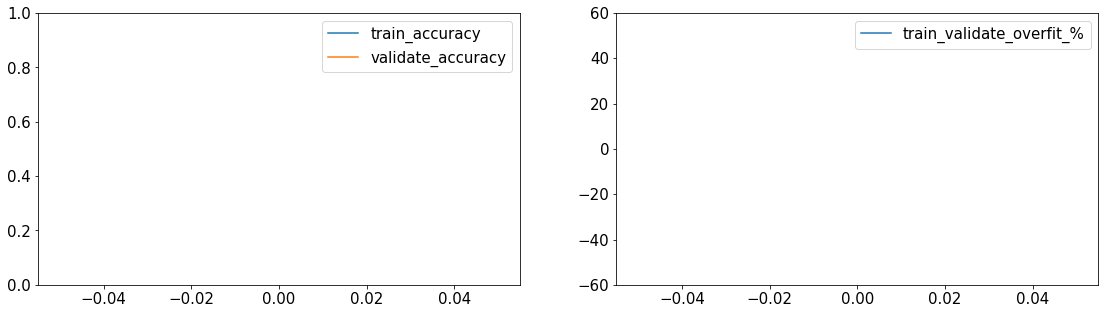

In [52]:
ig, ax = plt.subplots(1, 2, figsize=(19, 5))

ax[0].plot(temp_df['train_accuracy'], label='train_accuracy')
ax[0].plot(temp_df['validate_accuracy'], label='validate_accuracy')
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylim([0, 1])
ax[0].legend(fontsize=15)

ax[1].plot(temp_df['overfit_%'], label='train_validate_overfit_%')
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylim([-60, 60])
ax[1].legend(fontsize=15)

In [53]:
temp_df = zip(train_recall, validate_recall)
temp_df = pd.DataFrame(temp_df, columns=['train_recall', 'validate_recall'])
temp_df['overfit_%'] = (temp_df['validate_recall']-temp_df['train_recall'])/temp_df['train_recall']*100
temp_df

,train_recall,validate_recall,overfit_%
0,0.904494,0.833333,-7.867495


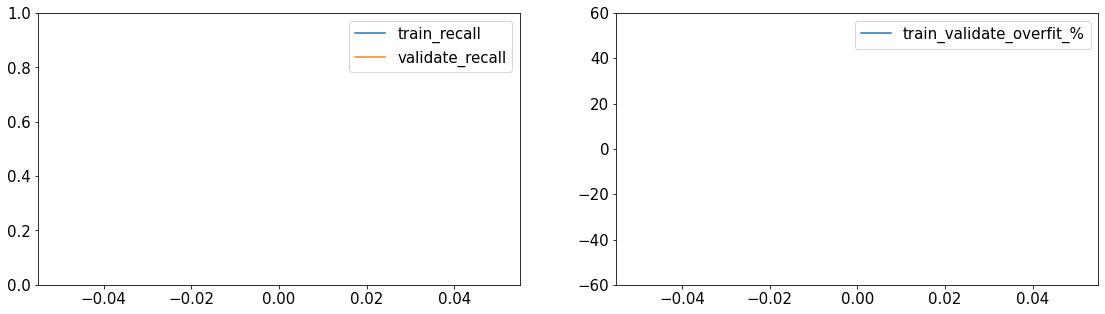

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

ax[0].plot(temp_df['train_recall'], label='train_recall')
ax[0].plot(temp_df['validate_recall'], label='validate_recall')
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylim([0, 1])
ax[0].legend(fontsize=15)

ax[1].plot(temp_df['overfit_%'], label='train_validate_overfit_%')
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylim([-60, 60])
ax[1].legend(fontsize=15)

In [55]:
temp_df = zip(train_precision, validate_precision)
temp_df = pd.DataFrame(temp_df, columns=['train_precision', 'validate_precision'])
temp_df['overfit_%'] = (temp_df['validate_precision']-temp_df['train_precision'])/temp_df['train_precision']*100
temp_df

,train_precision,validate_precision,overfit_%
0,0.662551,0.588235,-11.216661


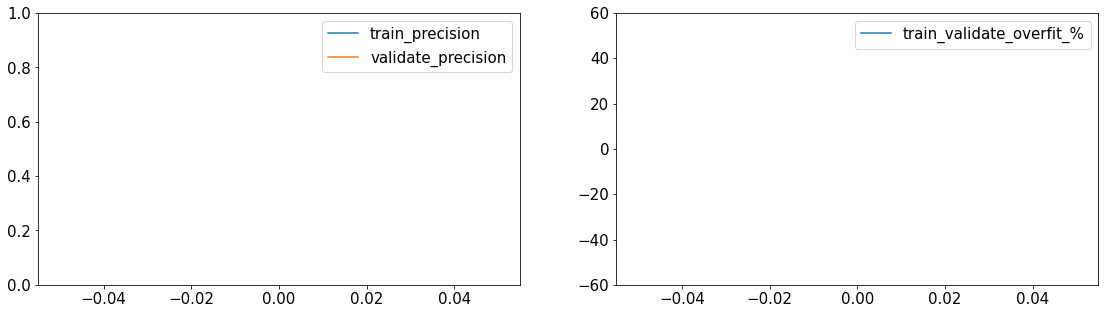

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

ax[0].plot(temp_df['train_precision'], label='train_precision')
ax[0].plot(temp_df['validate_precision'], label='validate_precision')
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].set_ylim([0, 1])
ax[0].legend(fontsize=15)

ax[1].plot(temp_df['overfit_%'], label='train_validate_overfit_%')
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].set_ylim([-60, 60])
ax[1].legend(fontsize=15)

In [57]:
# ---------- impute ----------

knn_impute = KNNImputer(n_neighbors=5)
X_impute, knn_impute_fit_transform = impute_fit_transform(X, knn_impute)

In [58]:
# ---------- oversample ----------

o_s = SMOTE(random_state=42, sampling_strategy=oversample)
X_impute_over, y_over = o_s.fit_resample(X_impute, y.ravel())

In [59]:
# ---------- scale ----------

ss = StandardScaler()
X_impute_over_scale, ss_fit_transform = scale_fit_transform(X_impute_over, ss)

In [60]:
# ---------- instantiate and fit regularized ----------

X_impute_over_scale_const = sm.add_constant(X_impute_over_scale)
lr = sm.Logit(y_over, X_impute_over_scale_const)
lr_result = lr.fit_regularized(maxiter=500, method='l1', alpha=reg_alpha)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5682799982572501
            Iterations: 90
            Function evaluations: 90
            Gradient evaluations: 90


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
# ---------- model summary ----------

print('-------------------- Model Summary 1: From Statsmodels API --------------------')
print('')
print(lr_result.summary())
print('')

print('-------------------- Model Summary 2: Sorted by ascending p --------------------')
print('')
temp_df = pd.read_html(lr_result.summary().tables[1].as_html(), header=0, index_col=0)[0]
temp_df = pd.DataFrame(temp_df)
temp_df.reset_index(level=0, inplace=True)
temp_df.rename(columns={'index': 'feature', 'std err': 'std_err', 'P>|z|': 'p', 'coef': 'std_coef'}, inplace=True)
temp_df = temp_df[['feature', 'std_coef', 'z', 'p']]
temp_df.sort_values(by='p', ascending=True, inplace=True)
print(temp_df)
print('')

print('-------------------- Model Summary 3: p < 0.05 sorted by coef --------------------')
print('')
print(temp_df[temp_df['p']<0.05][['feature', 'std_coef', 'z', 'p']].sort_values(by='std_coef'))

-------------------- Model Summary 1: From Statsmodels API --------------------

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  351
Model:                          Logit   Df Residuals:                      335
Method:                           MLE   Df Model:                           15
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.1761
Time:                        21:23:43   Log-Likelihood:                -199.47
converged:                       True   LL-Null:                       -242.10
Covariance Type:            nonrobust   LLR p-value:                 7.537e-12
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2630      0.124      2.114      0.035       0.019

In [62]:
#dump(knn_impute_fit_transform, open('impute_fit_transform.pkl', 'wb'))
dump(ss_fit_transform, open('scale_fit_transform.pkl', 'wb'))
dump(lr_result, open('model_log_reg_regz.pkl', 'wb'))

In [63]:
lrr_model = load(open('model_log_reg_regz.pkl', 'rb'))
#lrr_impute = load(open('impute_fit_transform.pkl', 'rb'))
lrr_scale = load(open('scale_fit_transform.pkl', 'rb'))

In [64]:
print(lrr_model.params)

const                              0.263043
Age                               -0.048805
Maximum anterior height            0.970915
Maximum Anterior Breadth          -0.891814
Antrosuperior breadth             -1.674912
Middle breadth                    -0.413741
Auricular surface height           0.086779
Auricular surface breadth          0.032763
Sacral index                       0.737856
 S1 Vertebral body mid-diameter    1.138976
Vertebral body width               0.342369
Spinal canal mid-diameter          0.399665
Spinal canal width                 0.271806
Pedicle depth                      0.386054
Pedicle width                      0.263548
Posterior pedicle height           0.037511
dtype: float64


In [65]:
X_given = pd.DataFrame(columns=lrr_model.params.index)

In [68]:
print(lrr_model.params.index[0])

const


In [71]:
X_given.loc[0, 'const'] = lrr_model.params.values[0]
X_given.loc[0, 'Age'] = 42.75
X_given.loc[0, 'Maximum anterior height'] = 2300
X_given.loc[0, 'Maximum Anterior Breadth '] = 19.286
X_given.loc[0, 'Antrosuperior breadth '] = 3.64
X_given.loc[0, 'Middle breadth'] = 9.22
X_given.loc[0, 'Auricular surface height'] = 0
X_given.loc[0, 'Auricular surface breadth'] = 98.54
X_given.loc[0, 'Sacral index'] = 0
X_given.loc[0, 'S1 Vertebral body mid-diameter'] = 0
X_given.loc[0, 'Vertebral body width'] = 89.11
X_given.loc[0, 'Spinal canal mid-diameter '] = 89.11
X_given.loc[0, 'Spinal canal width '] = 89.11
X_given.loc[0, 'Pedicle depth'] = 89.11
X_given.loc[0, 'Pedicle width '] = 89.11
X_given.loc[0, 'Posterior pedicle height '] = 89.11
print(X_given)
print('')

      const    Age Maximum anterior height  Maximum Anterior Breadth  \
0  0.263043  42.75                      NaN                      NaN   

  Antrosuperior breadth Middle breadth Auricular surface height   \
0                   NaN           9.22                       NaN   

  Auricular surface breadth Sacral index  S1 Vertebral body mid-diameter  ...  \
0                     98.54            0                             NaN  ...   

  Posterior pedicle height Maximum anterior height Maximum Anterior Breadth   \
0                      NaN                  2300.0                    19.286   

  Antrosuperior breadth  Auricular surface height  \
0                   3.64                      0.0   

  S1 Vertebral body mid-diameter  Spinal canal mid-diameter   \
0                            0.0                       89.11   

   Spinal canal width   Pedicle width   Posterior pedicle height   
0                89.11           89.11                      89.11  

[1 rows x 25 columns]